In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: <object object at 0x1121671f0>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from gfcat_utils import *

In [3]:
import numpy as np
from astropy.io import fits as pyfits
from astropy import wcs as pywcs
from astropy.visualization import simple_norm, ZScaleInterval
from photutils import DAOStarFinder, CircularAperture, aperture_photometry


In [4]:
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [5]:
fn = '/Users/cm/GFCAT/data/e42907/e42907-nd-full.fits.gz'

In [6]:
image,flagmap,edgemap,wcs,tranges,exptimes=read_image(fn)
image[np.where(np.isinf(image))]=0 # because it pops out with inf values... IDK
intensity_map = image / exptimes[0]
ix = np.where(image>0)
print(exptimes)
print(np.min(intensity_map[ix]),np.max(intensity_map[ix]),
      np.mean(intensity_map[ix]),np.median(intensity_map[ix]))
print(np.min(image[ix]),np.max(image[ix]),
      np.mean(image[ix]),np.median(image[ix]))


[1501.254622131994]

0.0005977154947144217 25.793112333021863 0.00668578269596341 0.0023434816603091083

0.897323149159937 38722.02910911881 10.037062174885175 3.5181626744206085

[0.00393546]

[1501.254622131994]

0.003996657137001284

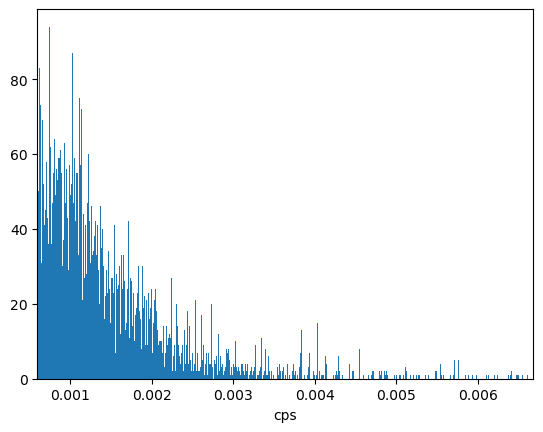

In [7]:
ix = np.where(image>0)
cps = (intensity_map[ix] / exptimes[0]).flatten()
plt.hist(cps,bins=1000,
         range=[np.min(intensity_map[ix]),np.mean(intensity_map[ix])]);
plt.xlabel('cps')
plt.xlim([np.min(intensity_map[ix]),np.mean(intensity_map[ix])])
print(np.percentile(cps,[99.995]))
print(exptimes)
print(6/exptimes[0])

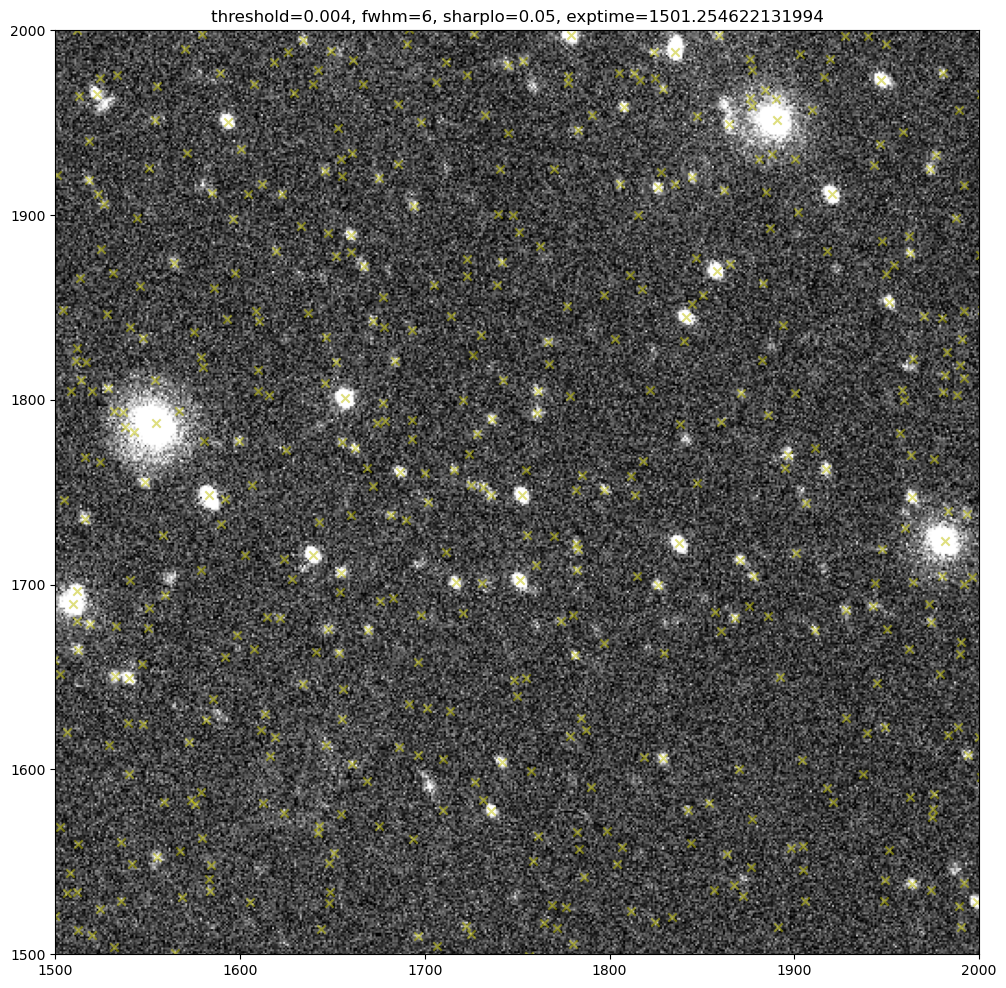

In [8]:
#    threshold,fwhm,
#    ratio=1.0,theta=0.0,
#    sigma_radius=1.5,sharplo=0.2,sharphi=1.0,
#    roundlo=-1.0,roundhi=1.0,sky=0.0,

for threshold in [0.004]:#[0.003,0.004,0.005,0.006]:
    for fwhm in [6]:#np.arange(1,21,5): # this is the clear leader
        for sharplo in [0.05]:
            daofind = DAOStarFinder(fwhm=fwhm, threshold=threshold, sharplo=sharplo)
            source_table = daofind(image / exptimes[0]).to_pandas()
            x = np.array(source_table['xcentroid'].tolist())
            y = np.array(source_table['ycentroid'].tolist())
            plt.figure(figsize=(12,12))
            plt.title(f"threshold={threshold}, fwhm={fwhm}, sharplo={sharplo}, exptime={exptimes[0]}")
            plt.imshow(ZScaleInterval()(image),cmap="Greys_r",origin="lower")
            plt.scatter(x,y,c='y',marker='x',alpha=0.5)
            plt.xlim([1500,2000])
            plt.ylim([1500,2000])

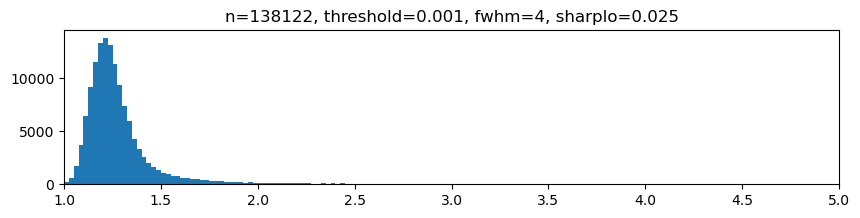

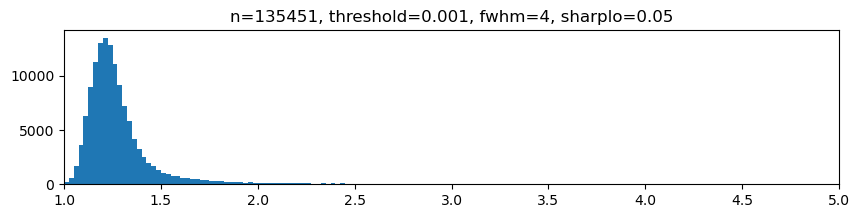

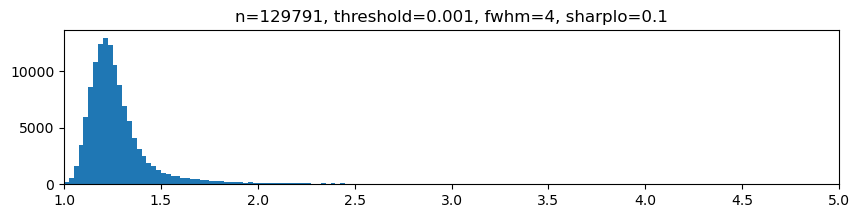

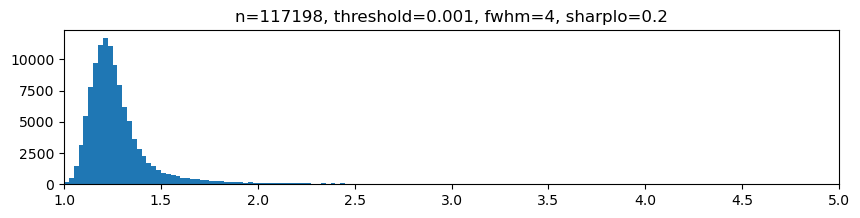

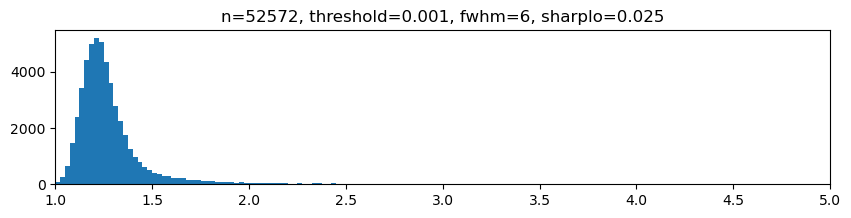

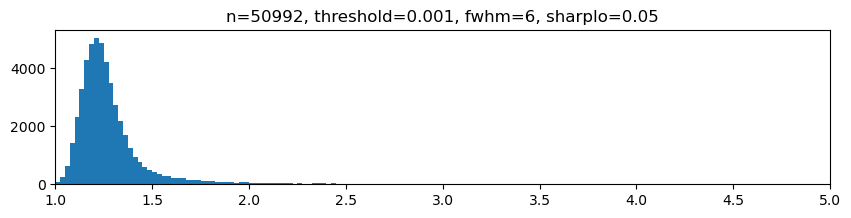

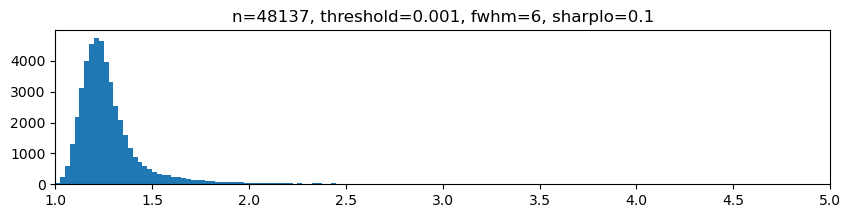

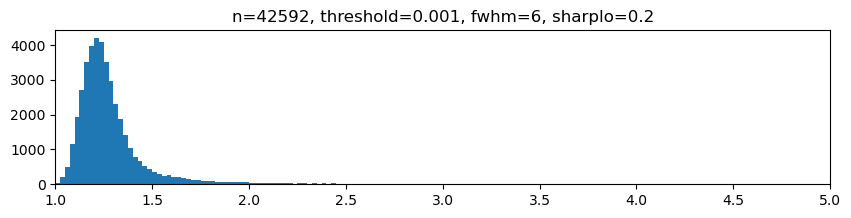

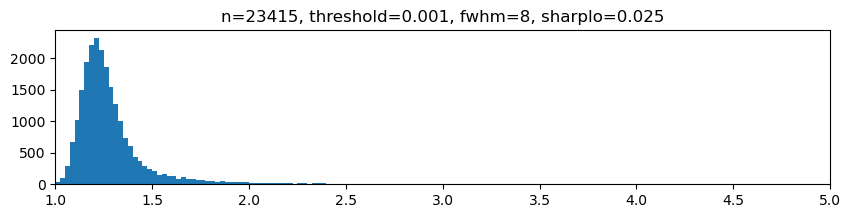

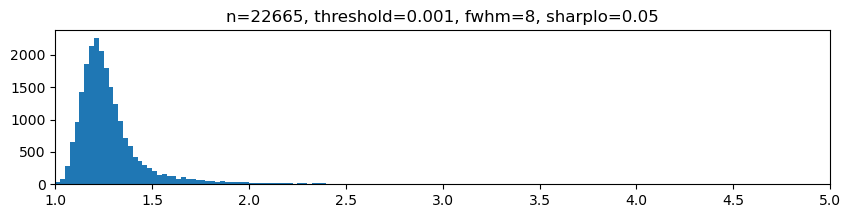

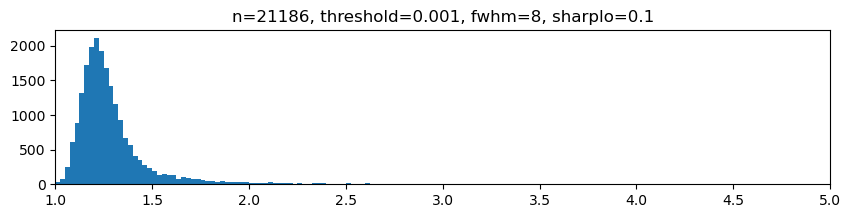

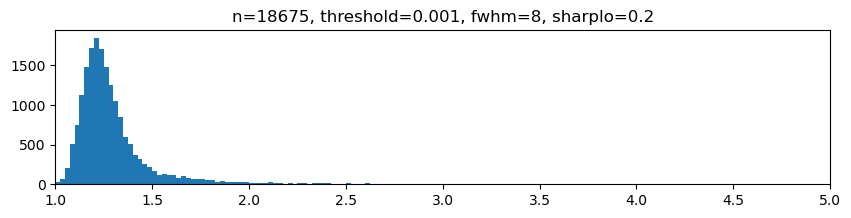

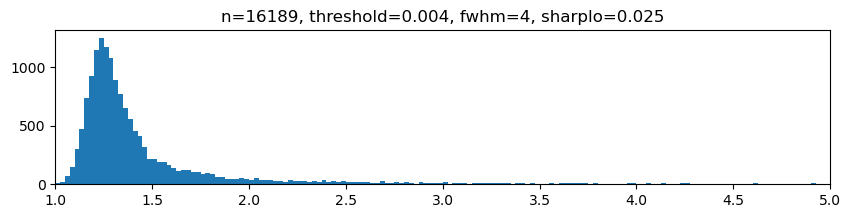

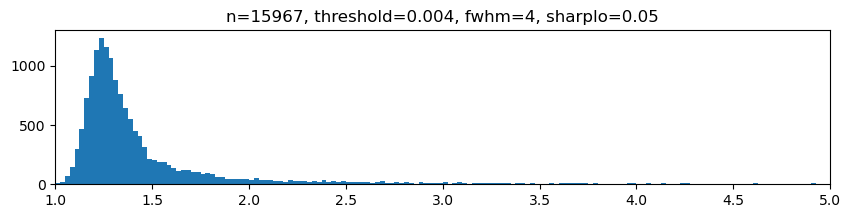

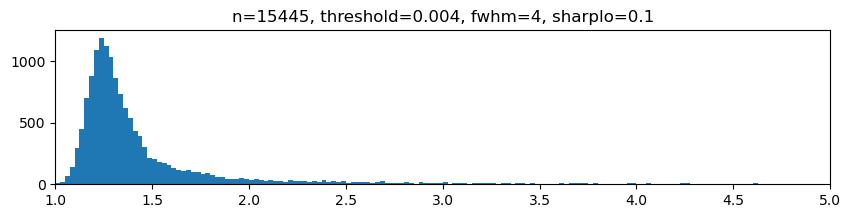

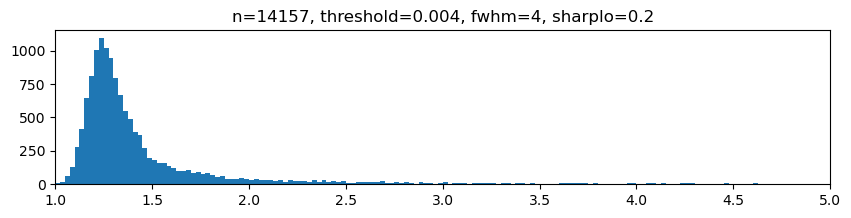

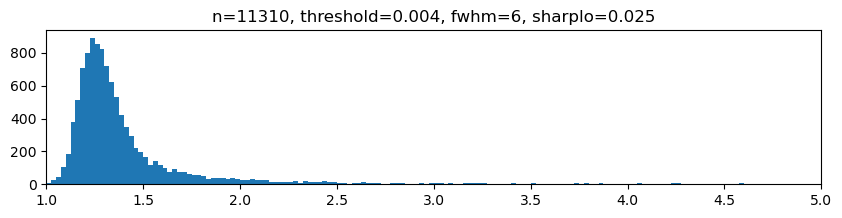

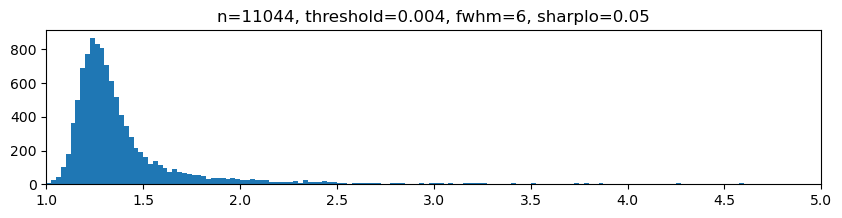

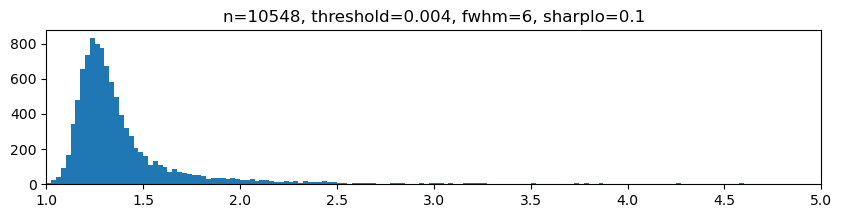

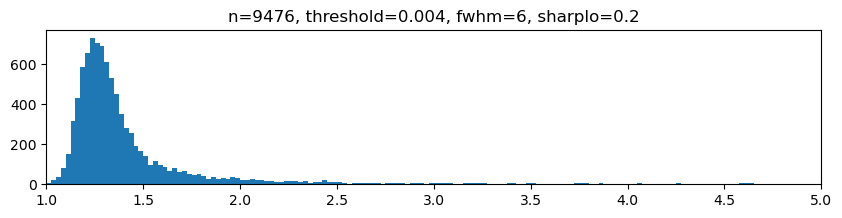

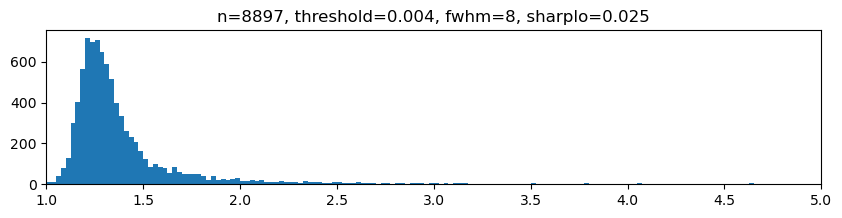

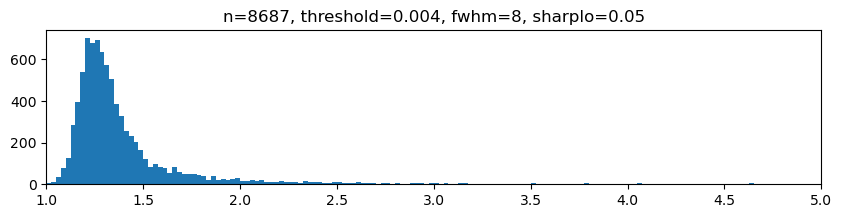

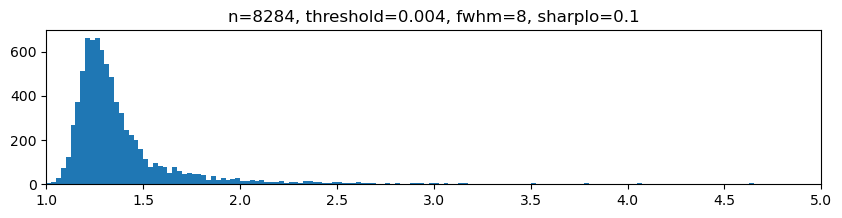

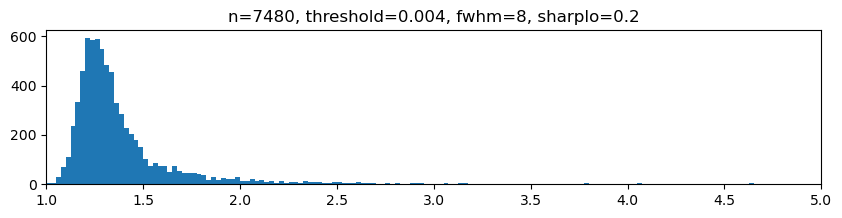

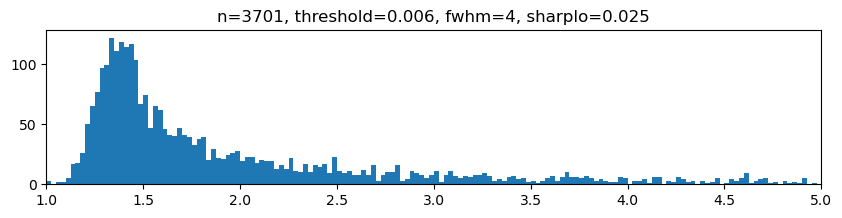

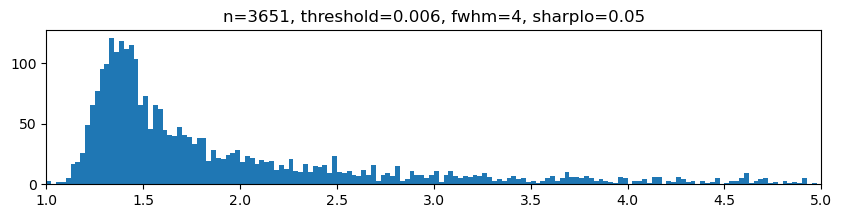

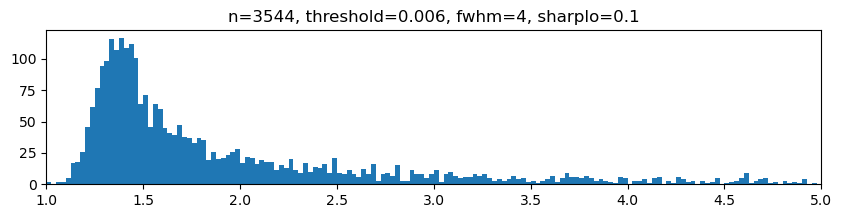

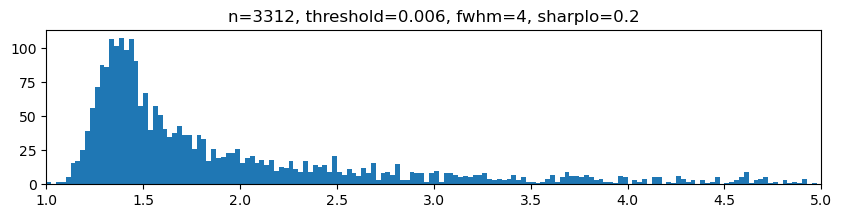

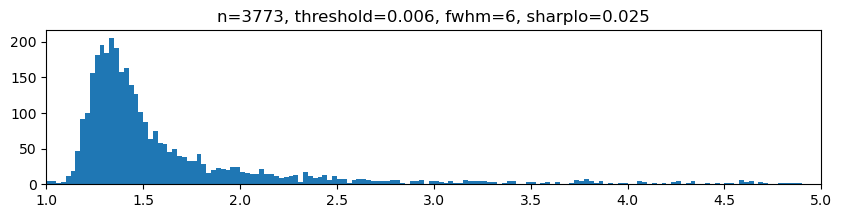

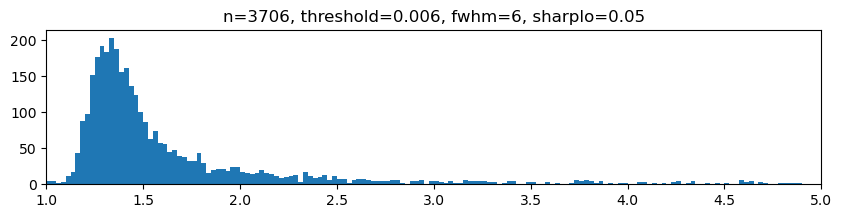

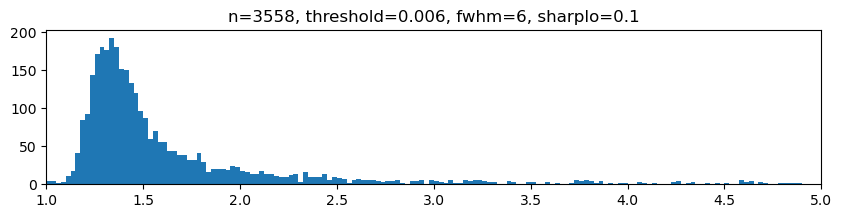

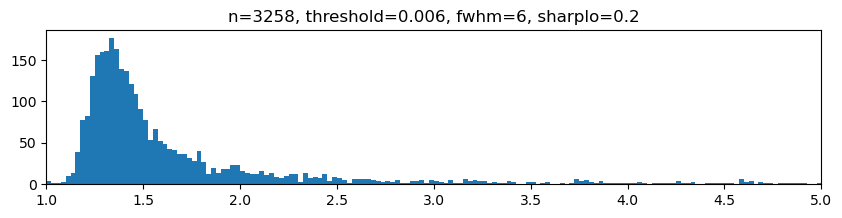

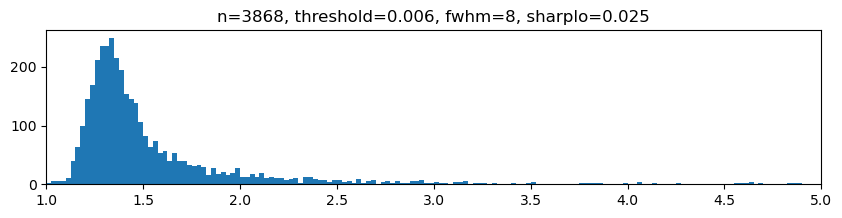

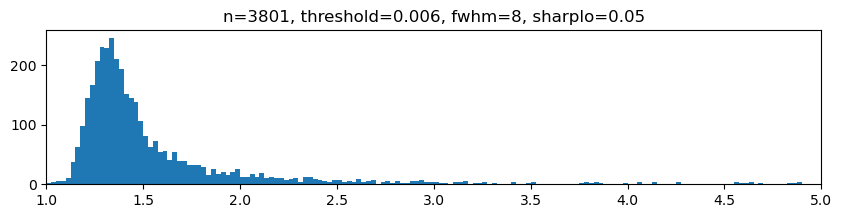

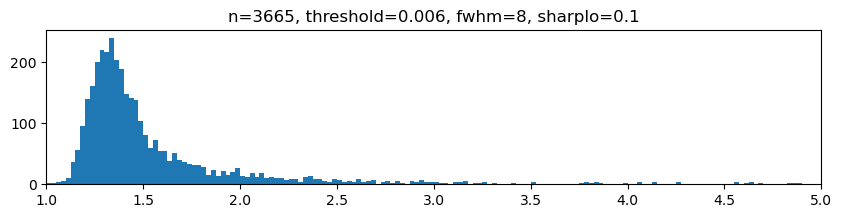

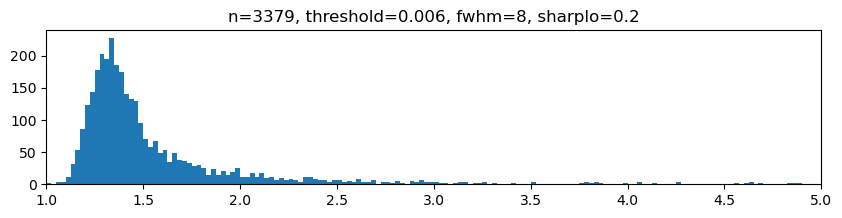

In [9]:
for threshold in [0.001,0.004,0.006]:#[0.003,0.004,0.005,0.006]:
    for fwhm in [4,6,8]:#np.arange(1,21,5): # this is the clear leader
        for sharplo in [0.025,0.05,0.1,0.2]:
            aperture_size=12.8
            daofind = DAOStarFinder(fwhm=fwhm, threshold=threshold, sharplo=sharplo)
            source_table = daofind(image / exptimes[0]).to_pandas()
            positions = source_table[["xcentroid", "ycentroid"]].values
            apertures = CircularAperture(positions, r=aperture_size)
            phot_table = aperture_photometry(image, apertures).to_pandas()
            cps = np.array(phot_table.aperture_sum / exptimes[0])
            n = len(cps)
            plt.figure(figsize=(10,2))
            plt.title(f"n={n}, threshold={threshold}, fwhm={fwhm}, sharplo={sharplo}")
            plt.hist(cps,range=[0,5],bins=200);
            #plt.vlines(0.4,0,200,color='k')
            plt.xlim([1,5])

(0.0, 5.0)

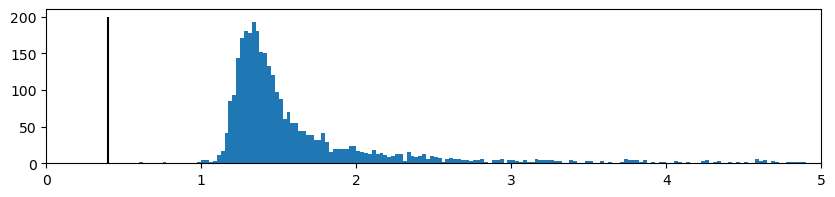

In [90]:
cps = np.array(phot_table.aperture_sum / exptimes[0])
plt.figure(figsize=(10,2))
plt.hist(cps,range=[0,5],bins=200);
plt.vlines(0.4,0,200,color='k')
plt.xlim([0,5])

In [59]:
for threshold in [0.003,0.004,0.005,0.006]:
    for fwhm in [4,5,6,7]:#np.arange(1,21,5): # this is the clear leader
        for sharplo in [0.1]:
            daofind = DAOStarFinder(fwhm=fwhm, threshold=threshold, sharplo=sharplo)
            source_table = daofind(image / exptimes[0]).to_pandas()
            positions = source_table[["xcentroid", "ycentroid"]].values
            apertures = CircularAperture(positions, r=aperture_size)
            phot_table = aperture_photometry(image, apertures).to_pandas()

            n = len(source_table['xcentroid'].tolist())
            print(f"{n} {threshold} {fwhm} {sharplo}")
    print("----")

49735 0.003 4 0.1

27854 0.003 5 0.1

25421 0.003 6 0.1

18915 0.003 7 0.1

----

28103 0.0035 4 0.1

17675 0.0035 5 0.1

16554 0.0035 6 0.1

13316 0.0035 7 0.1

----

15445 0.004 4 0.1

10964 0.004 5 0.1

10548 0.004 6 0.1

9174 0.004 7 0.1

----

8984 0.0045000000000000005 4 0.1

7193 0.0045000000000000005 5 0.1

7149 0.0045000000000000005 6 0.1

6687 0.0045000000000000005 7 0.1

----

In [10]:
? DAOStarFinder
